In [1]:
!git clone https://github.com/janchk/ML_HOMEWORK4
!wget https://snap.stanford.edu/data/loc-gowalla_edges.txt.gz
!wget  https://snap.stanford.edu/data/loc-gowalla_totalCheckins.txt.gz

Cloning into 'ML_HOMEWORK4'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 39 (delta 14), reused 31 (delta 8), pack-reused 0
Unpacking objects: 100% (39/39), done.
--2020-03-08 17:47:18--  https://snap.stanford.edu/data/loc-gowalla_edges.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6351523 (6.1M) [application/x-gzip]
Saving to: ‘loc-gowalla_edges.txt.gz’

loc-gowalla_edges.t 100%[===================>]   6.06M  2.51MB/s    in 2.4s    

2020-03-08 17:47:21 (2.51 MB/s) - ‘loc-gowalla_edges.txt.gz’ saved [6351523/6351523]

--2020-03-08 17:47:21--  https://snap.stanford.edu/data/loc-gowalla_totalCheckins.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|1

In [0]:
!gunzip loc-gowalla_edges.txt.gz
!gunzip loc-gowalla_totalCheckins.txt.gz

In [0]:
from ML_HOMEWORK4.src.ap_core import Ap
from ML_HOMEWORK4.src.ap_data import load_edges, load_checkins
import numpy as np
from tqdm import tqdm

ds_path = "loc-gowalla_edges.txt"
chk_path = "loc-gowalla_totalCheckins.txt"

In [0]:
def get_intersect(gt, pred):
    gt = set(gt)
    pred = set(pred)
    return len(gt.intersection(pred))


csr_ds = load_edges(ds_path)
checkins_train, checkins_test = load_checkins(chk_path)

In [0]:
from ML_HOMEWORK4.src.ap_core import Ap
from ML_HOMEWORK4.src.ap_data import load_edges, load_checkins
import numpy as np
from tqdm import tqdm

ds_path = "loc-gowalla_edges.txt"
chk_path = "loc-gowalla_totalCheckins.txt"

In [0]:
def get_intersect(gt, pred):
    gt = set(gt)
    pred = set(pred)
    return len(gt.intersection(pred))


csr_ds = load_edges(ds_path)
checkins_train, checkins_test = load_checkins(chk_path)

In [26]:
ap = Ap()
ap.fit(csr_ds, 10)

100%|██████████| 10/10 [02:20<00:00, 14.28s/it]


In [0]:
clusters = ap.get_clusters()
clust_sizes = [len(cluster) for cluster in clusters]

**Clusters info**

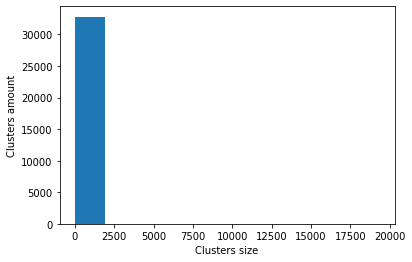

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Clusters size")
plt.ylabel("Clusters amount")
plt.hist(clust_sizes , bins=10)
plt.show()

In [29]:
topn_base = ap.predict(checkins_train)
cluster_prec = 0
base_prec = 0
for user_id in tqdm(np.unique(checkins_test.user_id)):
    gt_locs = checkins_test.loc[checkins_test.user_id == user_id, "location_id"].values
    if user_id in checkins_train.user_id:
        train_locs = ap.predict(checkins_train, user_id)
        cluster_prec += get_intersect(gt_locs, train_locs) / len(gt_locs)
        base_prec += get_intersect(gt_locs, topn_base) / len(gt_locs)
        # test_locs = ap.predict(checkins_test, user_id)



100%|██████████| 31411/31411 [01:00<00:00, 518.10it/s]


In [30]:
print(f"Base AP {base_prec/len(np.unique(checkins_test.user_id))}")
print(f"Cluster AP {cluster_prec/len(np.unique(checkins_test.user_id))}")


Base AP 0.0062758236949410845
Cluster AP 0.1744175064712727
